<a href="https://colab.research.google.com/github/filopacio/_python_4_analytics_nlp_project/blob/main/joint_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
## Comparing and contrasting ebola and covid spreading of information on Twitter
---

This project is a NLP analysis of Twitter.

Tweets related to COVID and EBOLA have been analysed in order to find, if any, some patterns in the spreading of news.

The research is mainly descriptive and focuses on two main different but actually interrelated themes:

- Sentiment Analysis.
Sentiments, initially labelled only as POSITIVE or NEGATIVE and then also analysed through more complex sentiments/emotions have been assigned to tweets and analysed. 

- Use Of Keywords.
Tweets have been processed in order to extrapolate the most commonly adopted words or expressions. The recurrence of words has been analysed also in relation to sentiments.

After having analysed separately the covid phenomenon and the ebola phenomenon, it is now time to investigate similarities and differences in order to find any pattern that can be associated to a pandemic outbreak.


In [57]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

##Upload Datasets

In [64]:
import csv

In [65]:
with open('df_c_ext.csv') as c:
    reader = csv.reader(c)
    l_c = list(reader)

df_c = pd.DataFrame(l_c,columns = ['','date', 'tweet','language' ,'username','tweets',	'polarity'	,'sentiment', 'polarized_sen'])[1:].dropna().reset_index()
df_c = df_c[['date', 'tweet','language' ,'username','tweets',	'polarity'	,'sentiment', 'polarized_sen']]

In [66]:
import  ast

In [67]:
for i in range(len(df_c)):
   df_c.tweets[i] = ast.literal_eval(df_c.tweets[i])

In [68]:
df_c.head()

,date,tweet,language,username,tweets,polarity,sentiment,polarized_sen
0,2019-12-29 05:21:25,@ross_robertross @LateRoundCorner Lamar gonna ...,en,Racist_Covid,"[rossrobertross, lateroundcorner, lamar, gonna...",-0.6705,negative,negative
1,2019-12-28 23:28:59,@CaslerNoel @DonaldJTrumpJr @realDonaldTrump @...,en,COVID_Careful,"[caslernoel, donaldjtrumpjr, realdonaldtrump, ...",0.25,neutral,neutral
2,2019-12-28 23:23:01,@realDonaldTrump You do realize SF is part of ...,en,COVID_Careful,"[realdonaldtrump, realize, sf, part, country, ...",0.7845,positive,positive
3,2019-12-28 22:16:08,I got a new mullet 🙊🙊 https://t.co/a6TBWBexG8,en,covid_mullet,"[got, new, mullet]",0.0,neutral,neutral
4,2019-12-28 21:35:16,@IDreamOfNinja Danny needs help. I refuse to h...,en,covid_longhaul,"[idreamofninja, danny, needs, help, refuse, he...",0.4939,positive,neutral


In [69]:
with open("df_e_ext.csv") as e:
    reader = csv.reader(e)
    l_e = list(reader)
    
df_e = pd.DataFrame(l_e,columns = ['','date', 'tweet','language' ,'username','polarity'	,'sentiment','tweets' ,'polarized_sen'])[1:].dropna().reset_index()
df_e = df_e[['date', 'tweet','language' ,'username','tweets',	'polarity','sentiment', 'polarized_sen']]

In [70]:
for i in range(len(df_e)):
   df_e.tweets[i] = ast.literal_eval(df_e.tweets[i])

In [71]:
df_e.head()

,date,tweet,language,username,tweets,polarity,sentiment,polarized_sen
0,2014-03-04 23:35:47,"So #sick today, fever 38.6, chills, muscle ach...",en,maryangelafitz,"[sick, today, fever, 386, chills, muscle, ache...",-0.5719,negative,negative
1,2014-03-04 22:14:13,New broad-spectrum nucleoside analog effective...,en,strnr,"[new, broad-spectrum, nucleoside, analog, effe...",-0.128,neutral,neutral
2,2014-03-04 22:09:42,I hear some parents hide money in pancakes. Y...,en,sack_vegas,"[hear, parents, hide, money, pancakes, yeah, t...",0.7667,positive,positive
3,2014-03-04 21:55:52,@surlyurbanist the flu? Ebola? Anything?,en,paulonabike,"[surlyurbanist, flu, ebola, anything]",-0.4836,negative,neutral
4,2014-03-04 21:43:23,@DrCaseby @Stgregslibrary close! Wasn't a viru...,en,RealMGHarris,"[drcaseby, stgregslibrary, close, wasnt, virus...",-0.4295,negative,neutral


In [72]:
df_c_neg = df_c[df_c.polarized_sen == 'negative'].reset_index()
df_c_pos = df_c[df_c.polarized_sen == 'positive'].reset_index()   

In [73]:
df_e_neg = df_e[df_e.polarized_sen == 'negative'].reset_index()
df_e_pos = df_e[df_e.polarized_sen == 'positive'].reset_index()

## Sentiment

In [74]:
sen = list(np.repeat(1,len(df_c)))
for i in range(len(df_c)):
   if float(df_c.polarity[i]) > 0:
     sen[i] = 'positive'
   else:
    sen[i] = 'negative'

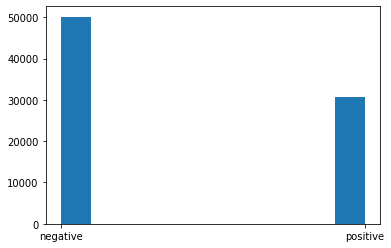

In [75]:
plt.hist(sen)
plt.show()

In [76]:
sen = list(np.repeat(1,len(df_e)))
for i in range(len(df_e)):
   if float(df_e.polarity[i]) > 0:
     sen[i] = 'positive'
   else:
     sen[i] = 'negative'

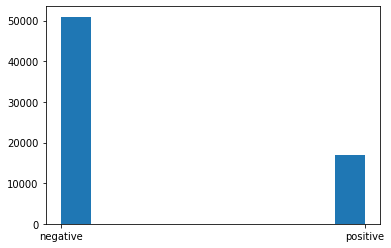

In [77]:
plt.hist(sen)
plt.show()

From those histograms more meaningful result are obtained. As expected, tweets related both to covid and ebola are, on average, much more negative than positive. 

## Analysis of keywords

Let us now create an even more polarized situation.

Let's take only the most polarized positive and  negative tweets in order to find (if any) differences and similarities in the use of most common words between very positive and very negative tweets.

In [101]:
from gensim.models import Word2Vec
from matplotlib_venn import venn2

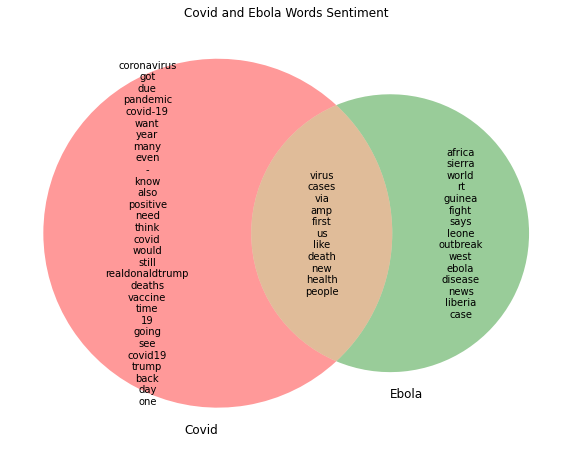

In [114]:
c = Word2Vec(df_c.tweets, min_count = 2000)
e = Word2Vec(df_e.tweets, min_count = 1500)

set1 = set(c.wv.vocab)
set2 = set(e.wv.vocab)

plt.figure(figsize=(10, 10))
venn = venn2([set1, set2], ('Covid','Ebola'))
venn.get_label_by_id('100').set_text('\n'.join(set1-set2))
venn.get_label_by_id('110').set_text('\n'.join(set1&set2))
venn.get_label_by_id('010').set_text('\n'.join(set2-set1))
plt.title('Covid and Ebola Words Sentiment')
plt.show()


With word2vec( ) the most common words inside the two polarized opposite sets are obtained. The results can be seen in the Venn Diagram above. Death and disease are the most incumbent topics (and interestingly also Trump) for the negative side while in the positive side there's a general sense of altruistic sentiment ('care', 'help', 'need', 'thank','please','love' etc.).

Also, it might be interesting to explore the overall difference in length between positive and negative tweets.

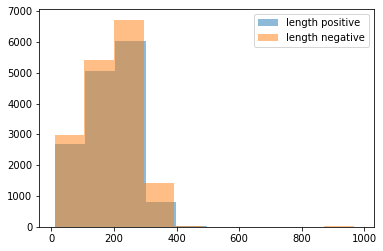

In [109]:
df_c_neg['length'] = [len(i) for i in df_c_neg.tweet]
df_c_pos['length'] = [len(i) for i in df_c_pos.tweet]

plt.hist(df_c_pos.length, label = 'length positive',alpha = 0.5)
plt.hist(df_c_neg.length, label = 'length negative', alpha = 0.5)
plt.legend(loc='upper right')
plt.show()

In [ ]:
import scipy

In [131]:
scipy.stats.ttest_ind( df_c_neg.length,df_c_pos.length)

Ttest_indResult(statistic=2.6772210450626894, pvalue=0.007427448247813678)

For covid-related tweets, from the two-tailed test it emerges that the average length of positive tweets is statistically significantly less than negative ones (p-value < 0.01).

In [110]:
df_e_neg['length'] = [len(i) for i in df_e_neg.tweet]
df_e_pos['length'] = [len(i) for i in df_e_pos.tweet]

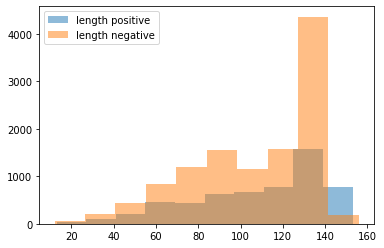

In [111]:
plt.hist(df_e_pos.length, label = 'length positive',alpha = 0.5)
plt.hist(df_e_neg.length, label = 'length negative', alpha = 0.5)
plt.legend(loc='upper left')
plt.show()

In [130]:
scipy.stats.ttest_ind( df_e_neg.length,df_e_pos.length)

195.2818824382287

On the other hand, the t-test for ebola-tweets does not reject the null hypotheses, therefore no significant difference in length may be assumed (p-value > 0.01).

In [112]:
import wordcloud

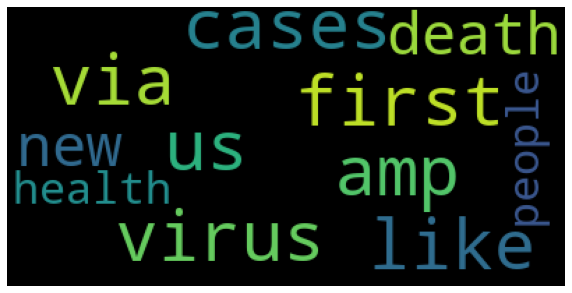

In [115]:
inter_set = set1.intersection(set2)

wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=50, stopwords = ['dict_keys','-'])
wc = wc.generate(str(",".join(inter_set)))
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wc)
plt.show()

## Introducing more articulated emotions

When dealing with a pandemic event, the distinction of sentiment only based on 'positive', 'negative', or'neutral' sentiment may be restrictive. It might be interesting to investigate more articulated emotions of tweets, and in this section this kind of investigation will be performed.


As in (Xue, J. et al, 2020), I adopted NRCLex for emotion detection. 

NRCLex is a package trough which more articulated sentiments can be obtained. In particular, the emotions of:

- Trust
- Fear
- Anticipation
- Anger
- Joy
- Sadness
- Disgust
- Surprise

are recognised and assigned a number from 0 to 1 based on the polarity of the emotion. There may be several emotions representing a tweet, with the sum of ther polarities being equal to 1.

For covid analysis, 5 main periods have been identified. 
Their labels are, obviously, broad approximations of reality that don't take into account singular states/regions/continents situations. 

- 1/01/2020 - 29/02/2020  : initial period, news spreading
- 1/03/2020 - 31/05/2020  : lockdown
- 1/06/2020 - 30/09/2020  : rules/laws softening
- 1/10/2020 - 31/01/2021  : new emergency
- 1/02/2021 - 30/06/2021  : vaccine campaigns

A sentiment analysis and a keywords analysis based on those 5 periods is performed in order to evaluate relevant differences. 

In [94]:
!pip install NRCLex

In [95]:
from nrclex import NRCLex
from collections import Counter
import nltk
nltk.download('punkt')
from datetime import datetime

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Two functions have been created to retrieve the emotions for each tweet.

- getEmotion( ) returns a dictionary where emotions and corresponding frequencies of each tweet are stored.

- EmotionSummary( ) returns a dictionary with the overall sum of frequencies of each emotion.


In [96]:
def getEmotion(sentence):
  emotion = NRCLex(sentence) 
  a_l = emotion.affect_frequencies
  return a_l

def EmotionSummary(list):
  emotions = [getEmotion(i) for i in list]
  c = Counter()
  for d in emotions:
    c.update(d)
  c = dict(c)
  c = dict(sorted(c.items(), key=lambda item: item[1], reverse=True))
  c.pop('negative')   
  c.pop('positive')
  c.pop('anticip')
  return c

**Covid**

In [97]:
covid_emotion_sum = EmotionSummary(df_c.tweet)

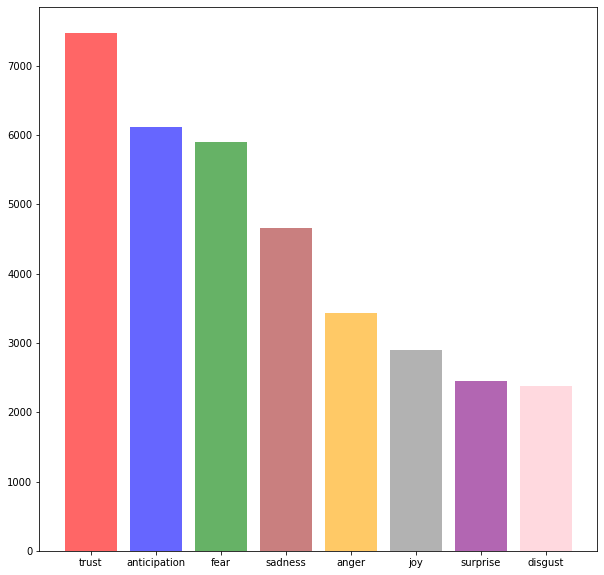

In [98]:
plt.figure(figsize=(10,10))
plt.bar(covid_emotion_sum.keys(), covid_emotion_sum.values(), color = ['red','blue', 'green', 'brown', 'orange','grey','purple', 'pink'], alpha = 0.6)
plt.show()

The results does not correspond exactly to the one obtained in (Xue J. et al, 2020), however I used much less data than the mentioned study and my data also comes from a different period, where new progresses in dealing with the pandemic have been done and may have change the prevalent emotions on social media. Still, the results are similar.

**Ebola**

In [99]:
ebola_emotion_sum = EmotionSummary(df_e.tweet)

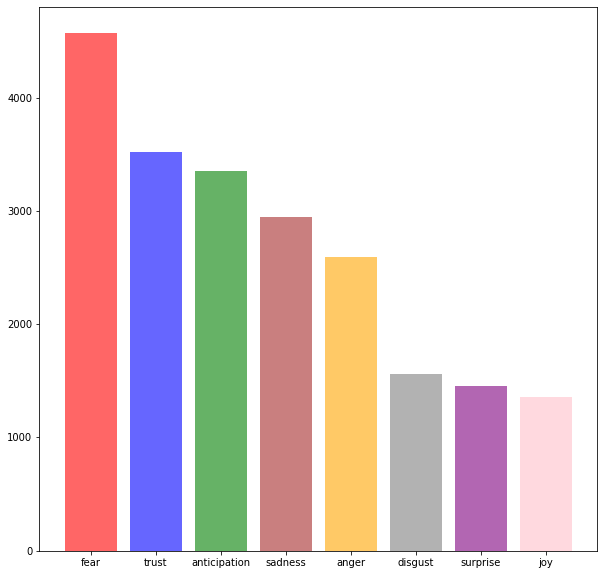

In [100]:
plt.figure(figsize=(10,10))
plt.bar(ebola_emotion_sum.keys(), ebola_emotion_sum.values(), color = ['red','blue', 'green', 'brown', 'orange','grey','purple', 'pink'], alpha = 0.6)
plt.show()

For ebola analysis data haven't been divided into periods but only general emotion analysis has been computed. 

In this case, fear is clearly the most present sentiment, followed by trust, anticipation and sadness. 

The first five emotions, regardless the rank, are the same both for ebola and covid and might be considered the 5 emotions associated with a pandemic outbreak.

## Conclusion and Final Remarks

Having compared keywords and sentiment for both the pandemic event, some conclusions may be drawn.


1 ) The common most used keywords, which can be seen also in the wordcloud in the Keyword Analysis section, are mostly health/death related, togheter with other expectable words like 'virus' or 'cases'.  This features may be recognised as very specific of pandemic event and should be taken into consideration when a social-media analysis is performed to investigate pandemic outbreak. 

2) The emotion analysis shows, despite with different ranking, that the first five emotions (in particular, also the first three) are the same for both the pandemic events. What can be noticed is also that surprise and joy, which may be suspected to be often related to viral news, are actually not very present in this analysis. 

This may suggest that pandemic events have their own specific emotion-ranking which makes them different from other types of spreading news. This could be a small step towards an alternative way to identify news-spreading patterns different from the modelling of information virality, such as in (Liang, H. et al, 2019).

## References

- Xue, J., Chen, J., Hu, R., Chen, C., Zheng, C., Su, Y., Zhu, T., *Twitter Discussions and Emotions About the COVID-19 Pandemic: Machine Learning Approach*, J Med Internet Res. 2020 Nov 25;22(11):e20550. doi: 10.2196/20550. PMID: 33119535; PMCID: PMC7690968. 

- Liang, H., Fung, I.CH., Tse, Z.T.H. et al., 2019, *How did Ebola information spread on twitter: broadcasting or viral spreading?*, BMC Public Health 19, 438 (2019). https://doi.org/10.1186/s12889-019-6747-8 

- VanderPlas, J., 2016, *Python Data Science Handbook: Essential Tools for Working with Data*, O'Reilly. 

